<a id="2"></a>
# <div style="padding:40px;color:black;margin:0;font-size:55px;font-family:Roboto;text-align:center;display:fill;border-radius:10px;background-color:#008080;overflow:hidden"><b>HDSC-STAGE E QUIZ</b></div>

In [1]:
# Importing Modules and Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error    
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the dataset

df = pd.read_csv('Dataset.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [4]:
# Check for rows and columns of the dataset

df.shape

(92016, 5)

In [5]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [6]:
# Check for Null Values

df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
#convert full date column to date time

df["FullDate"] = pd.to_datetime(df["FullDate"])
df.set_index("FullDate", inplace = True)

In [8]:
# Check for changes

df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 11</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Resample the data from an hour sampling rate to a new sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?</h3>



In [9]:
# Upsample Full Date from Hourly to Daily

resampled_df = df.resample('D').sum()
resampled_df.head(2)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.70
2010-09-02,369.6,38898.99,88.56,570.81


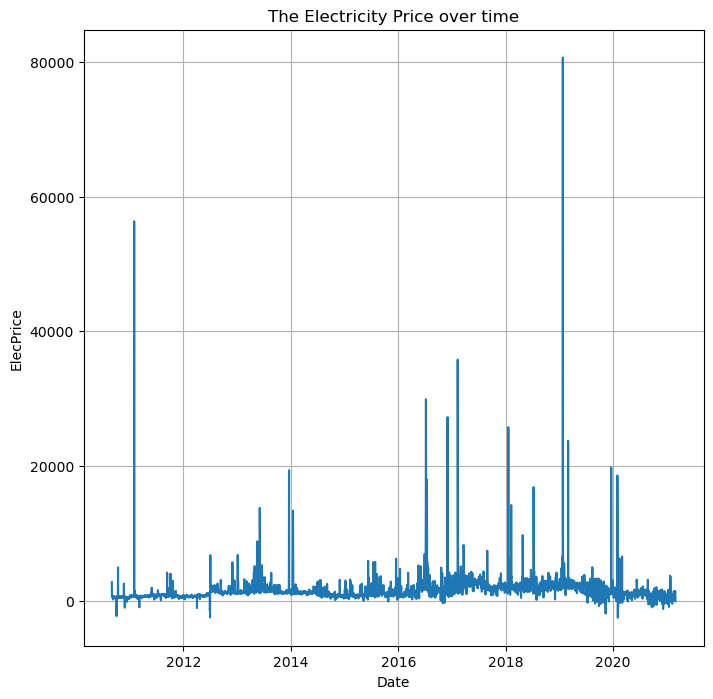

In [10]:
# Electricity Price over time

plt.figure(figsize=(8,8))
plt.plot(resampled_df.index, resampled_df.ElecPrice)
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('The Electricity Price over time')
plt.grid()
plt.show()

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 12</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?</h3>



In [11]:
P_sys = adfuller(resampled_df['SysLoad'])
P_gas = adfuller(resampled_df['GasPrice'])

print('P-value of SysLoad: {}'.format(round(P_sys[1], 6)))
print('P-value of GasPrice: {}'.format(round(P_gas[1], 6)))

P-value of SysLoad: 0.004254
P-value of GasPrice: 0.045027


<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 13</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?</h3>



In [12]:
Ctv_gas = adfuller(resampled_df['GasPrice'])
Ctv_elp = adfuller(resampled_df['ElecPrice'])

print('Critical Values of GasPrice: {}'.format(Ctv_gas[4], 4))

print('Critical Values of ElecPrice: {}'.format(Ctv_elp[4], 4))


Critical Values of GasPrice: {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}
Critical Values of ElecPrice: {'1%': -3.432066157296446, '5%': -2.8622983040036005, '10%': -2.5671736550459663}


<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Further Instructions (14-16)</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Using the new sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’)</h3>



In [13]:
resampled_df.reset_index(inplace=True)

resampled_df0 = resampled_df.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',})

In [14]:
train = resampled_df0[:2757]
test = resampled_df0[2757:]

In [15]:
# Modelling

my_model = Prophet()
my_model.fit(train[['ds', 'y']])

14:21:46 - cmdstanpy - INFO - Chain [1] start processing
14:21:47 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
pred = my_model.predict(test)

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 14 </h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places? Hint:
Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.</h3>



In [17]:
MAPE = mean_absolute_percentage_error(test.y, pred.yhat)  * 100

print("The MAPE is :",round(MAPE,2))

The MAPE is : 547.58


<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 15 </h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>What is the RMSE in 2 decimal places?</h3>



In [18]:
RMSE = sqrt(mean_squared_error(test.y, pred.yhat))
print("The RMSE is :", round(RMSE,2))

The RMSE is : 3214.12


<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 16 </h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?</h3>



In [19]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2689.339501,155.089205,4781.581878,2689.339501,2689.339501,-155.544743,-155.544743,-155.544743,9.730924,9.730924,9.730924,-165.275667,-165.275667,-165.275667,0.0,0.0,0.0,2533.794758
1,2018-03-21,2690.146479,329.089919,5098.817343,2690.146479,2690.146479,-2.999529,-2.999529,-2.999529,159.371311,159.371311,159.371311,-162.370841,-162.370841,-162.370841,0.0,0.0,0.0,2687.146950
2,2018-03-22,2690.953457,487.194169,5389.641207,2690.953457,2690.953457,95.220809,95.220809,95.220809,257.123036,257.123036,257.123036,-161.902227,-161.902227,-161.902227,0.0,0.0,0.0,2786.174266
3,2018-03-23,2691.760435,174.778880,5203.404555,2691.760435,2691.760435,-113.426059,-113.426059,-113.426059,50.278212,50.278212,50.278212,-163.704271,-163.704271,-163.704271,0.0,0.0,0.0,2578.334376
4,2018-03-24,2692.567413,-219.854779,4570.642834,2692.567413,2692.567413,-438.985887,-438.985887,-438.985887,-271.450904,-271.450904,-271.450904,-167.534983,-167.534983,-167.534983,0.0,0.0,0.0,2253.581526


<function matplotlib.pyplot.show(close=None, block=None)>

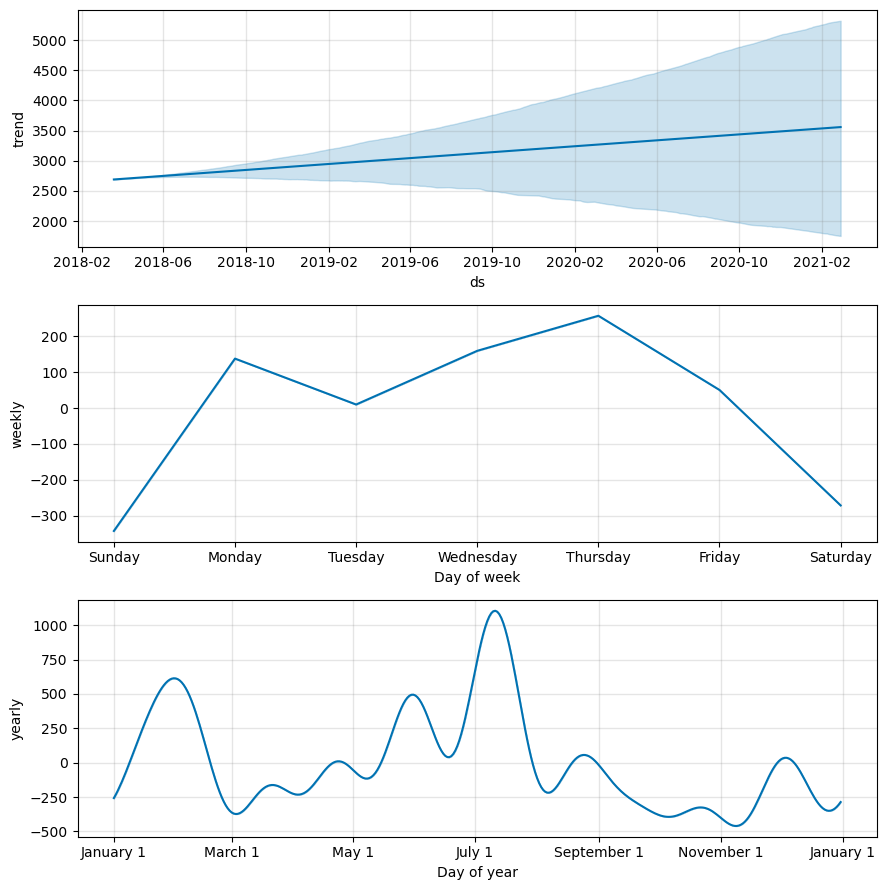

In [20]:
my_model.plot_components(pred)
plt.show

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Answer: July</h3>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Further Instructions (17-19)</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice.</h3>



In [21]:
resampled_df.reset_index(inplace=True)

resampled_df.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [22]:
resampled_df1 = resampled_df.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                     'Tmax':'add2',
                                    'GasPrice':'add3'})

In [23]:
train1 = resampled_df1[:2757]
test1 = resampled_df1[2757:]


In [24]:
train1.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [25]:
my_model1 = Prophet()
my_model1.add_regressor('add1')
my_model1.add_regressor('add2')
my_model1.add_regressor('add3')
my_model1.fit(train1)



14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:54 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
pred1 = my_model1.predict(test1)

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 17 </h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?</h3>



In [27]:
MAPE1 = mean_absolute_percentage_error(test1.y, pred1.yhat)  * 100

print("The MAPE is :",round(MAPE1,2))

The MAPE is : 231.04


<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 18 </h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>What is the RMSE in 2 decimal places?</h3>



In [28]:
RMSE1 = sqrt(mean_squared_error(test1.y, pred1.yhat))
print("The RMSE is :", round(RMSE1,2))

The RMSE is : 2706.71


<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 19 </h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?</h3>



<function matplotlib.pyplot.show(close=None, block=None)>

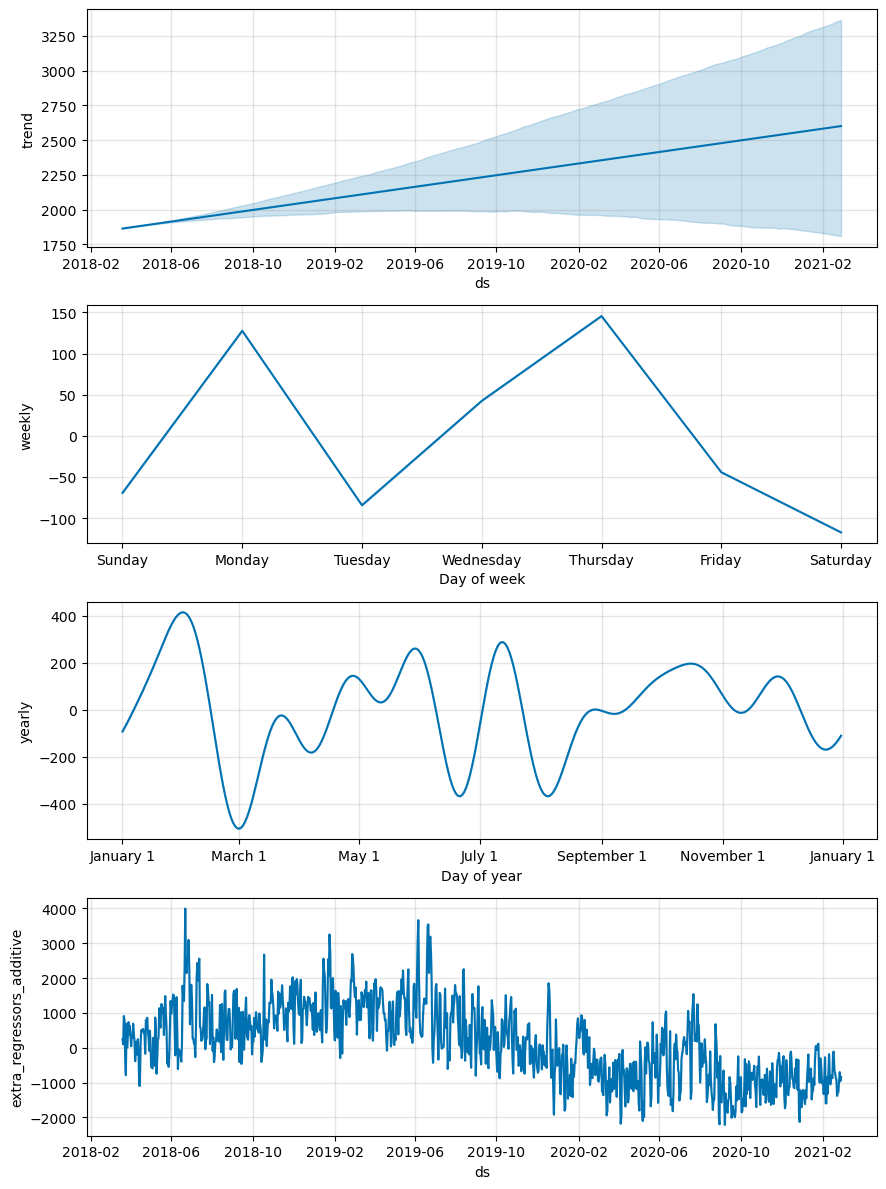

In [29]:
my_model1.plot_components(pred1)
plt.show

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Answer: Thursday</h3>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Question 20</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?</h3>



In [30]:
resampled_df.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [31]:
resampled_df2 = resampled_df.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                    'GasPrice':'add2'})


resampled_df2 = resampled_df2.drop('Tmax', axis = 1)

resampled_df2.head()

,index,ds,add1,add2,y
0,0,2010-09-01,41565.380,88.56,2751.700
1,1,2010-09-02,38898.990,88.56,570.810
2,2,2010-09-03,41665.760,106.80,504.975
3,3,2010-09-04,35638.085,81.36,502.275
4,4,2010-09-05,35611.410,106.80,500.555


In [32]:
train2 = resampled_df2[:2757]
test2 = resampled_df2[2757:]

In [33]:
my_model2 = Prophet()
my_model2.add_regressor('add1')
my_model2.add_regressor('add2')
my_model2.fit(train2)

14:22:01 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
pred2 = my_model2.predict(test2)

In [35]:
MAPE2 = mean_absolute_percentage_error(test2.y, pred2.yhat)  * 100

print("The MAPE is :",round(MAPE2,2))

The MAPE is : 235.82
